In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("../DATA/penguins_size.csv")

In [5]:
df = df.dropna()

In [7]:
df.head(10)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,FEMALE
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,MALE
12,Adelie,Torgersen,41.1,17.6,182.0,3200.0,FEMALE
13,Adelie,Torgersen,38.6,21.2,191.0,3800.0,MALE
14,Adelie,Torgersen,34.6,21.1,198.0,4400.0,MALE


In [9]:
X = pd.get_dummies(df.drop("species", axis=1), drop_first=True)
y = df["species"]

In [11]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
rfc = RandomForestClassifier(n_estimators=10, max_features="sqrt", random_state=101)

In [23]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=101)

In [25]:
preds = rfc.predict(X_test)

In [27]:
preds

array(['Chinstrap', 'Gentoo', 'Adelie', 'Chinstrap', 'Gentoo',
       'Chinstrap', 'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo', 'Adelie',
       'Adelie', 'Adelie', 'Gentoo', 'Gentoo', 'Adelie', 'Gentoo',
       'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Chinstrap', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Chinstrap', 'Gentoo', 'Adelie',
       'Chinstrap', 'Gentoo', 'Chinstrap', 'Gentoo', 'Adelie', 'Adelie',
       'Chinstrap', 'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo', 'Adelie',
       'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Chinstrap', 'Chinstrap',
       'Chinstrap', 'Chinstrap', 'Chinstrap', 'Adelie', 'Adelie',
       'Gentoo', 'Gentoo', 'Chinstrap', 'Adelie', 'Chinstrap',
       'Chinstrap', 'Gentoo', 'Adelie', 'Chinstrap', 'Gentoo', 'Adelie',
       'Adelie', 'Adelie', 'Gentoo', 'Chinstrap', 'Chinstrap', 'Gentoo',
       'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo',
       'Gentoo', 'Gentoo', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie',
       'Adelie', 'Gentoo', 'A

In [29]:
from sklearn.metrics import classification_report, confusion_matrix

In [31]:
confusion_matrix(y_test, preds)

array([[39,  2,  0],
       [ 1, 22,  0],
       [ 0,  0, 37]], dtype=int64)

In [33]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

      Adelie       0.97      0.95      0.96        41
   Chinstrap       0.92      0.96      0.94        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.97       101
   macro avg       0.96      0.97      0.97       101
weighted avg       0.97      0.97      0.97       101



In [35]:
df = pd.read_csv("../DATA/data_banknote_authentication.csv")

In [37]:
df.head(10)

,Variance_Wavelet,Skewness_Wavelet,Curtosis_Wavelet,Image_Entropy,Class
0,3.62160,8.6661,-2.80730,-0.44699,0
1,4.54590,8.1674,-2.45860,-1.46210,0
2,3.86600,-2.6383,1.92420,0.10645,0
3,3.45660,9.5228,-4.01120,-3.59440,0
4,0.32924,-4.4552,4.57180,-0.98880,0
5,4.36840,9.6718,-3.96060,-3.16250,0
6,3.59120,3.0129,0.72888,0.56421,0
7,2.09220,-6.8100,8.46360,-0.60216,0
8,3.20320,5.7588,-0.75345,-0.61251,0
9,1.53560,9.1772,-2.27180,-0.73535,0


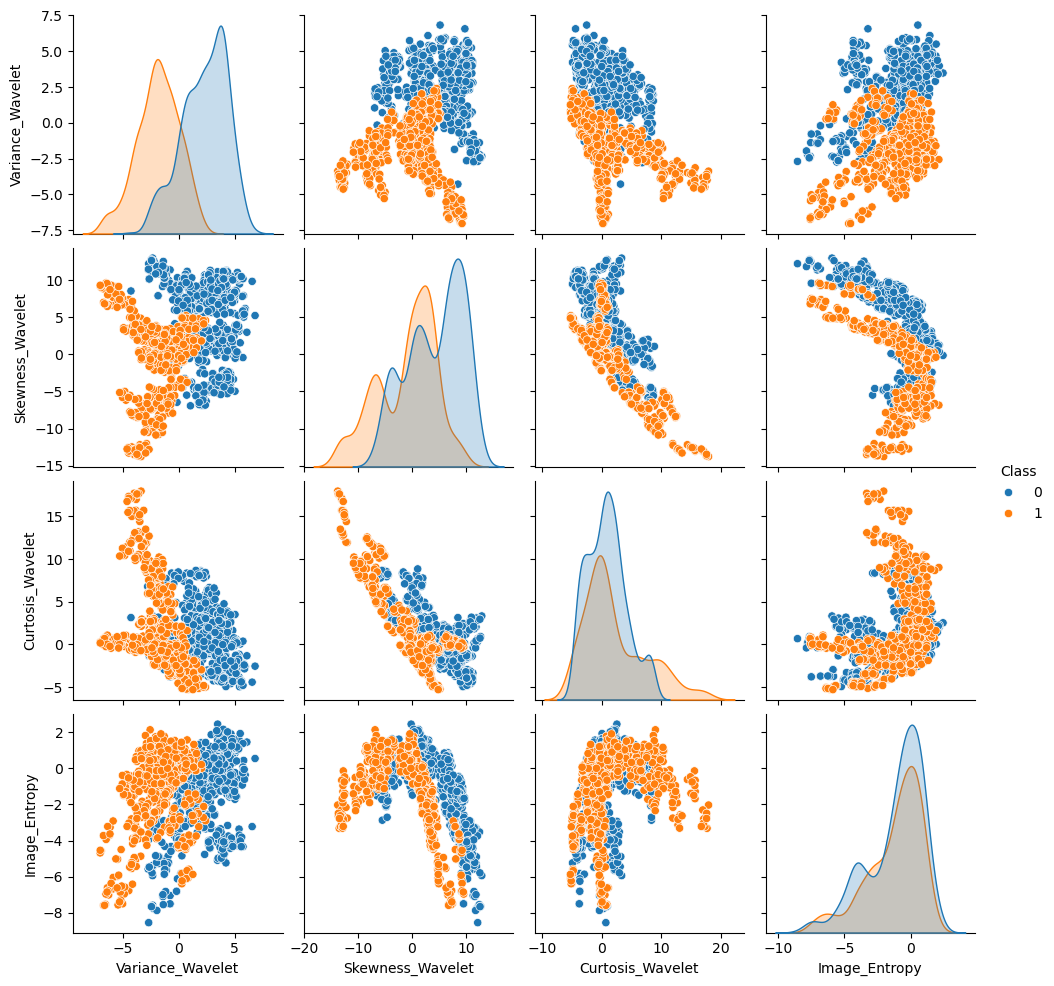

In [39]:
sns.pairplot(data=df, hue="Class")

In [41]:
X = df.drop("Class", axis=1)
y = df["Class"]

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [45]:
from sklearn.model_selection import GridSearchCV

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
n_estimators = [64, 100, 128, 200]
max_features = [2, 3, 4]
bootstrap = [True, False]
oob_score = [True, False]

In [53]:
param_grid = {"n_estimators": n_estimators, "max_features": max_features, "bootstrap": bootstrap, "oob_score": oob_score}

In [55]:
rfc = RandomForestClassifier()

In [57]:
grid = GridSearchCV(rfc, param_grid=param_grid)

In [59]:
grid.fit(X_train, y_train)

C:\Users\honer\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
60 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\honer\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\honer\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\honer\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    raise ValueError

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [64, 100, 128, 200],
                         'oob_score': [True, False]})

In [61]:
grid.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 128, 'oob_score': False}

In [63]:
rfc = RandomForestClassifier(max_features=2, n_estimators=128, oob_score = True)

In [67]:
rfc.fit(X_train, y_train)

RandomForestClassifier(max_features=2, n_estimators=128, oob_score=True)

In [69]:
rfc.oob_score

True

In [71]:
rfc.oob_score_

0.9939965694682675

In [73]:
predictions = rfc.predict(X_test)

In [75]:
from sklearn.metrics import classification_report, confusion_matrix

In [77]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       124
           1       0.98      1.00      0.99        82

    accuracy                           0.99       206
   macro avg       0.99      0.99      0.99       206
weighted avg       0.99      0.99      0.99       206



In [79]:
df = pd.read_csv("../DATA/rock_density_xray.csv")

In [81]:
df.head(10)

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374
5,89.647973,2.499600
6,69.492733,2.385000
7,20.150520,2.500673
8,82.256337,2.700880
9,64.424802,2.220781


In [83]:
df.columns = ["signal", "density"]

<Axes: xlabel='signal', ylabel='density'>

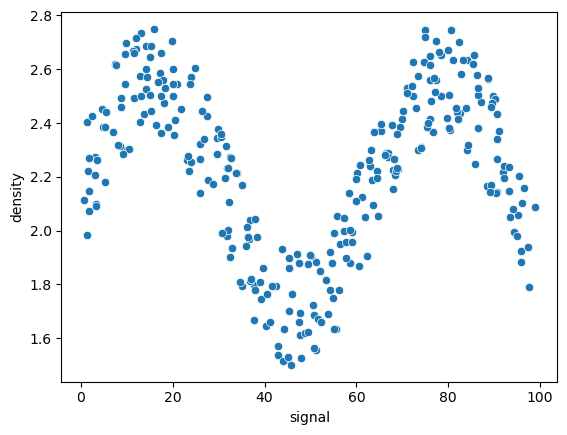

In [85]:
sns.scatterplot(data=df, x="signal", y="density")

In [97]:
X = df["signal"].values.reshape(-1, 1)
y = df["density"]

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [91]:
from sklearn.linear_model import LinearRegression

In [101]:
lr_model = LinearRegression()

In [103]:
lr_model.fit(X_train, y_train)

LinearRegression()

In [105]:
lr_preds = lr_model.predict(X_test)

In [107]:
lr_preds

array([2.22029657, 2.22047771, 2.22035637, 2.22034337, 2.22039737,
       2.22050555, 2.22042659, 2.22028877, 2.22034673, 2.22029714,
       2.22041506, 2.22050153, 2.22043891, 2.22042003, 2.22047022,
       2.22032403, 2.22033377, 2.22030628, 2.22035154, 2.22035373,
       2.22029266, 2.22036798, 2.22033018, 2.22030611, 2.22042754,
       2.22044019, 2.2204142 , 2.22040303, 2.22048946, 2.22047495])

In [109]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [111]:
mean_absolute_error(y_test, lr_preds)

0.211198973318633

In [119]:
np.sqrt(mean_squared_error(y_test, lr_preds))

0.2570051996584629

In [123]:
signal_range = np.arange(0, 100, 1)
signal_preds = lr_model.predict(signal_range.reshape(-1, 1))


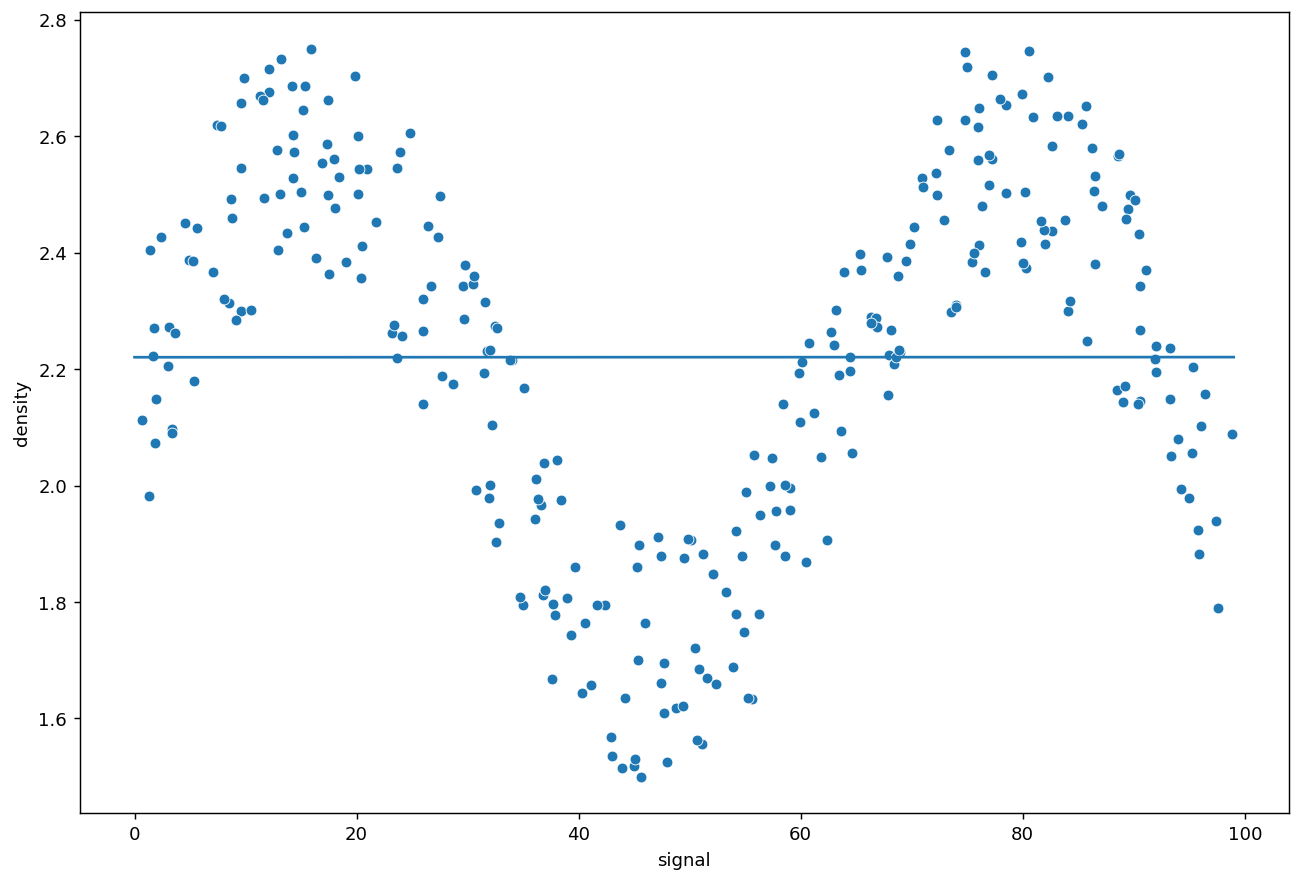

In [125]:
plt.figure(figsize=(12, 8), dpi=130)
sns.scatterplot(data=df, x="signal", y="density")
plt.plot(signal_range, signal_preds)


In [129]:
def run_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    mae = mean_absolute_error(y_test, preds)
    print(f"RMSE: {rmse}")
    print(f"MAE: {mae}")
    signal_range = np.arange(0, 100)
    signal_preds = model.predict(signal_range.reshape(-1, 1))
    plt.figure(figsize=(12, 8), dpi=130)
    sns.scatterplot(data=df, x="signal", y="density", color="black")
    plt.plot(signal_range, signal_preds)

In [137]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures


In [147]:
pipe = make_pipeline(PolynomialFeatures(degree=5), LinearRegression())

RMSE: 0.14452810847146833
MAE: 0.11864309497327703


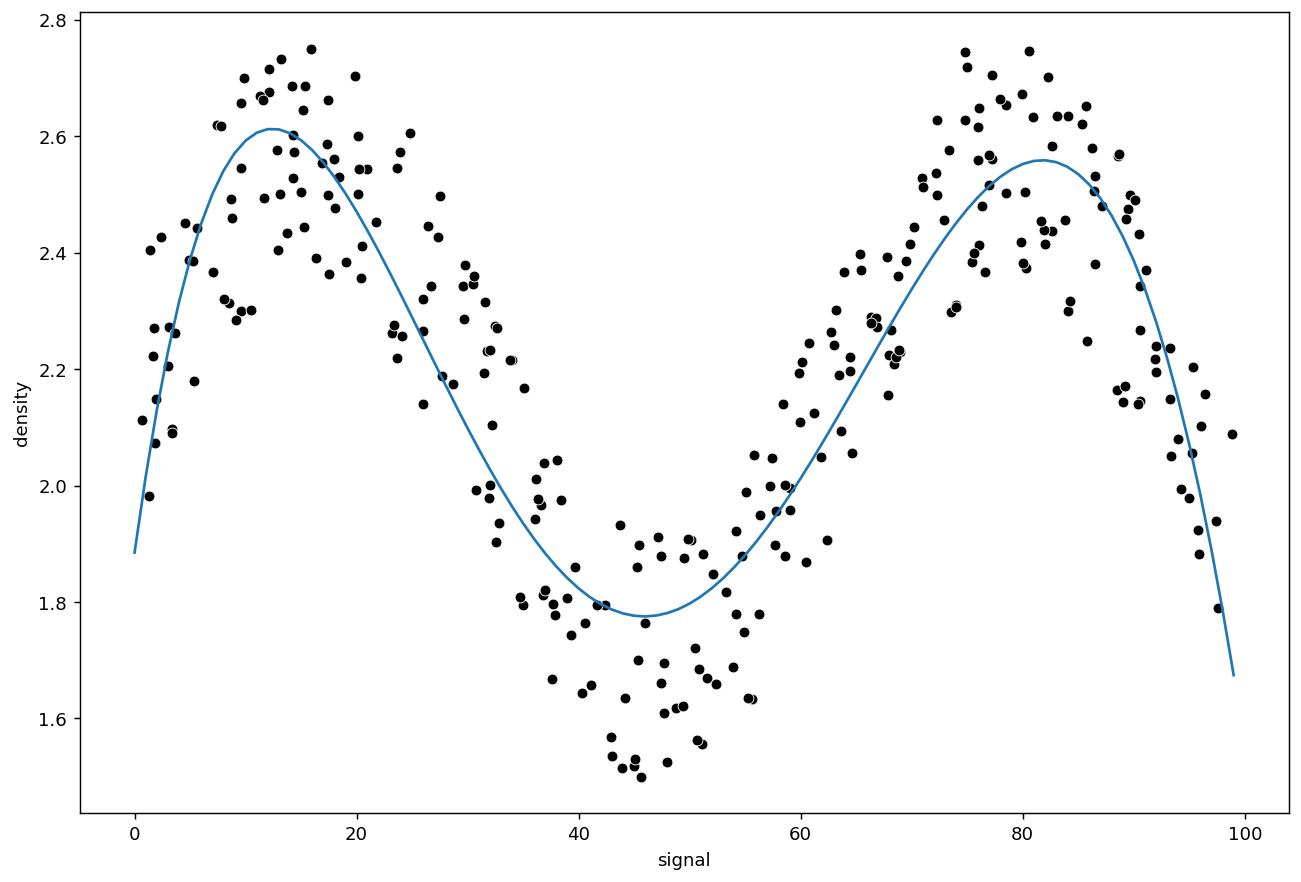

In [149]:
run_model(pipe, X_train, y_train, X_test, y_test)

In [151]:
from sklearn.neighbors import KNeighborsRegressor

In [157]:
k_values = [1, 5, 10, 30]

RMSE: 0.1523487028635337
MAE: 0.11877297474442378
RMSE: 0.13730685016923647
MAE: 0.12198383614100558
RMSE: 0.13277855732740926
MAE: 0.11635971693292672


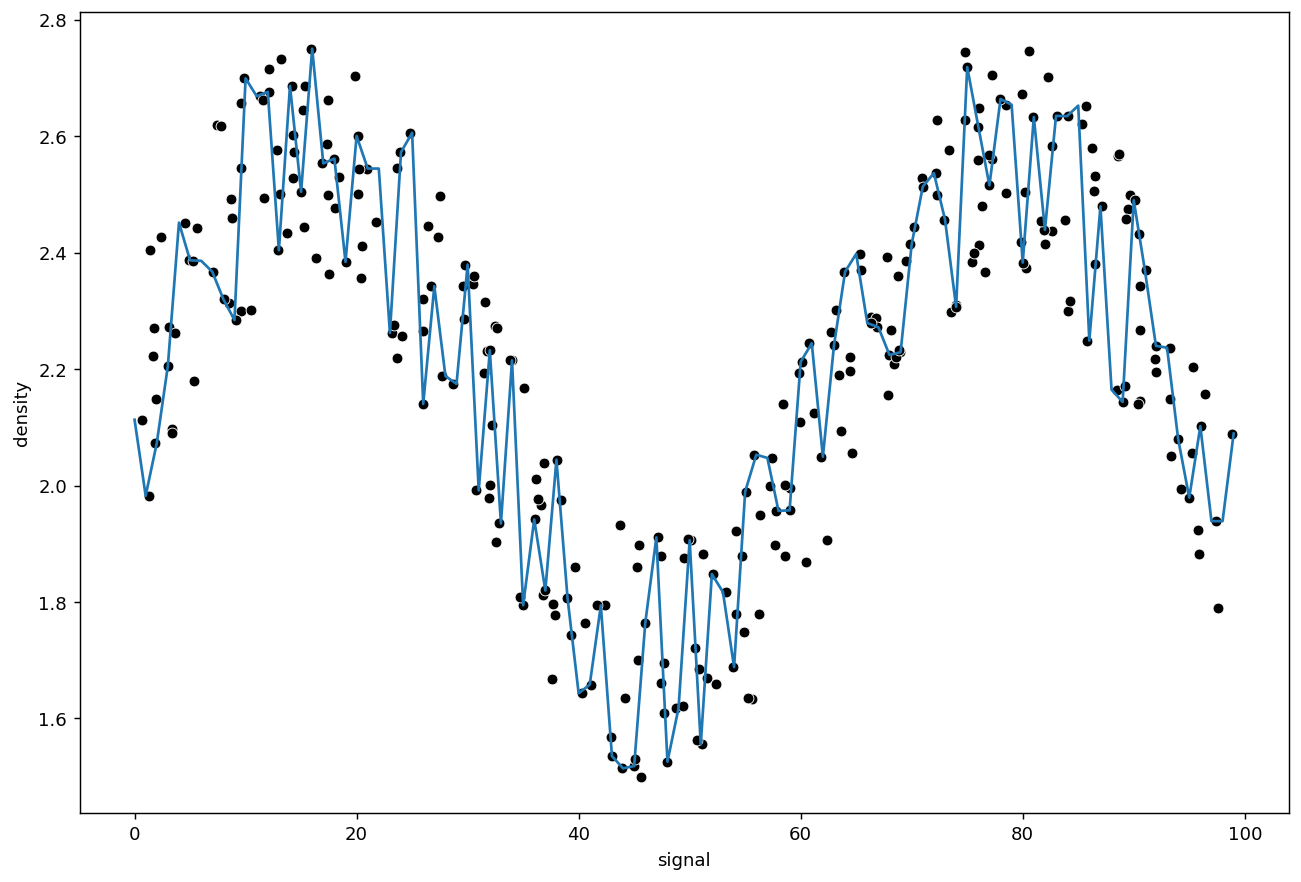

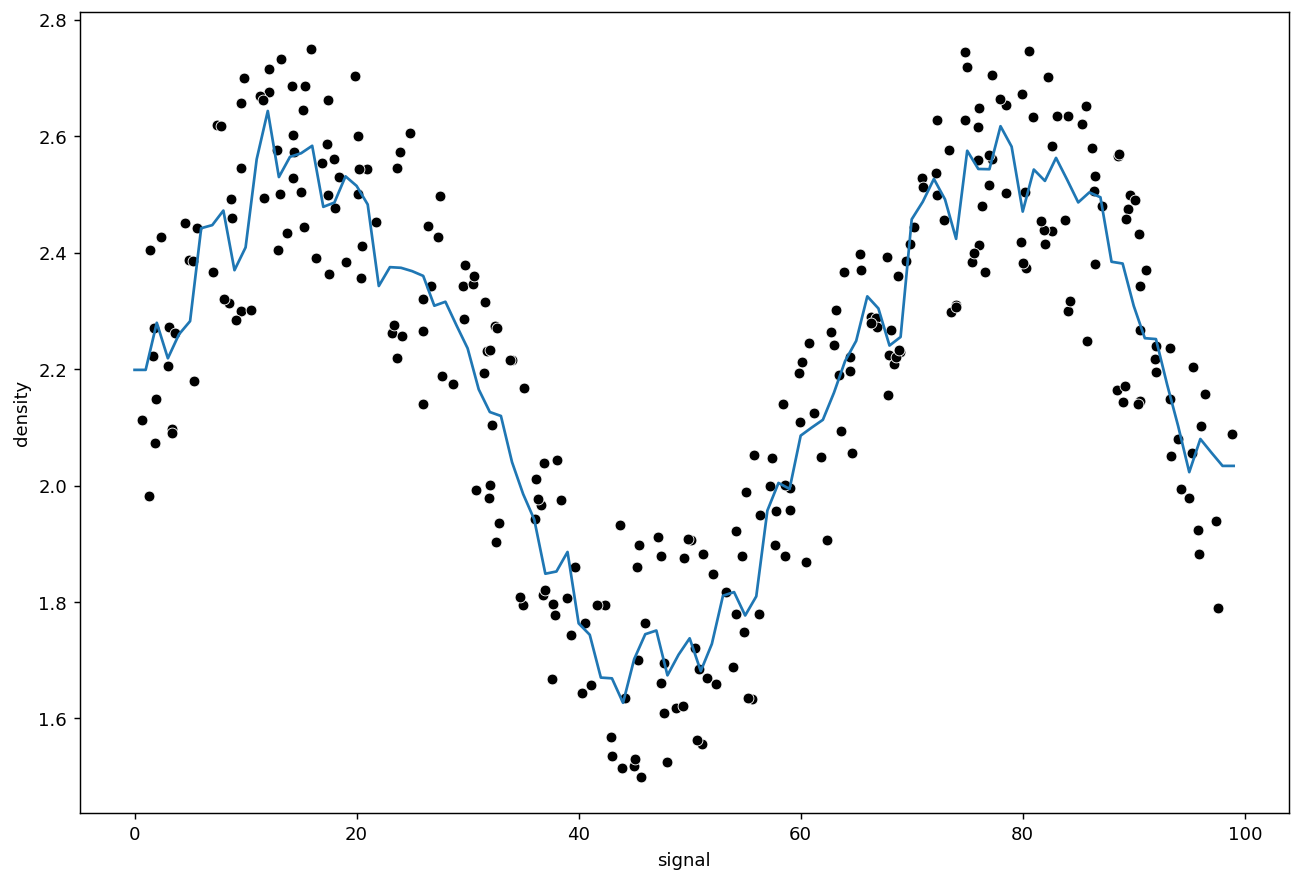

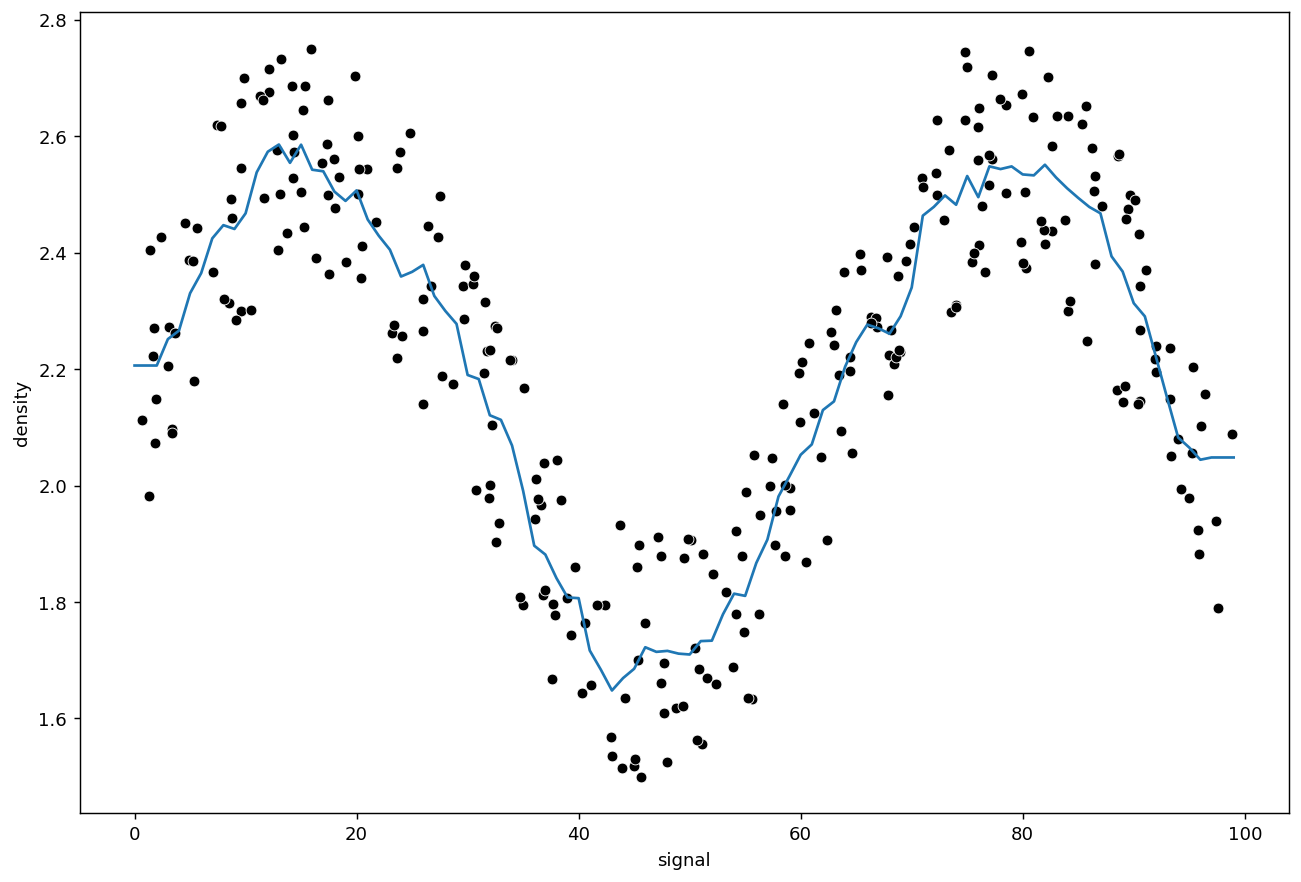

In [155]:
for n in k_values:
    model = KNeighborsRegressor(n_neighbors=n)
    run_model(model, X_train, y_train, X_test, y_test)

In [159]:
from sklearn.tree import DecisionTreeRegressor

RMSE: 0.1523487028635337
MAE: 0.11877297474442378


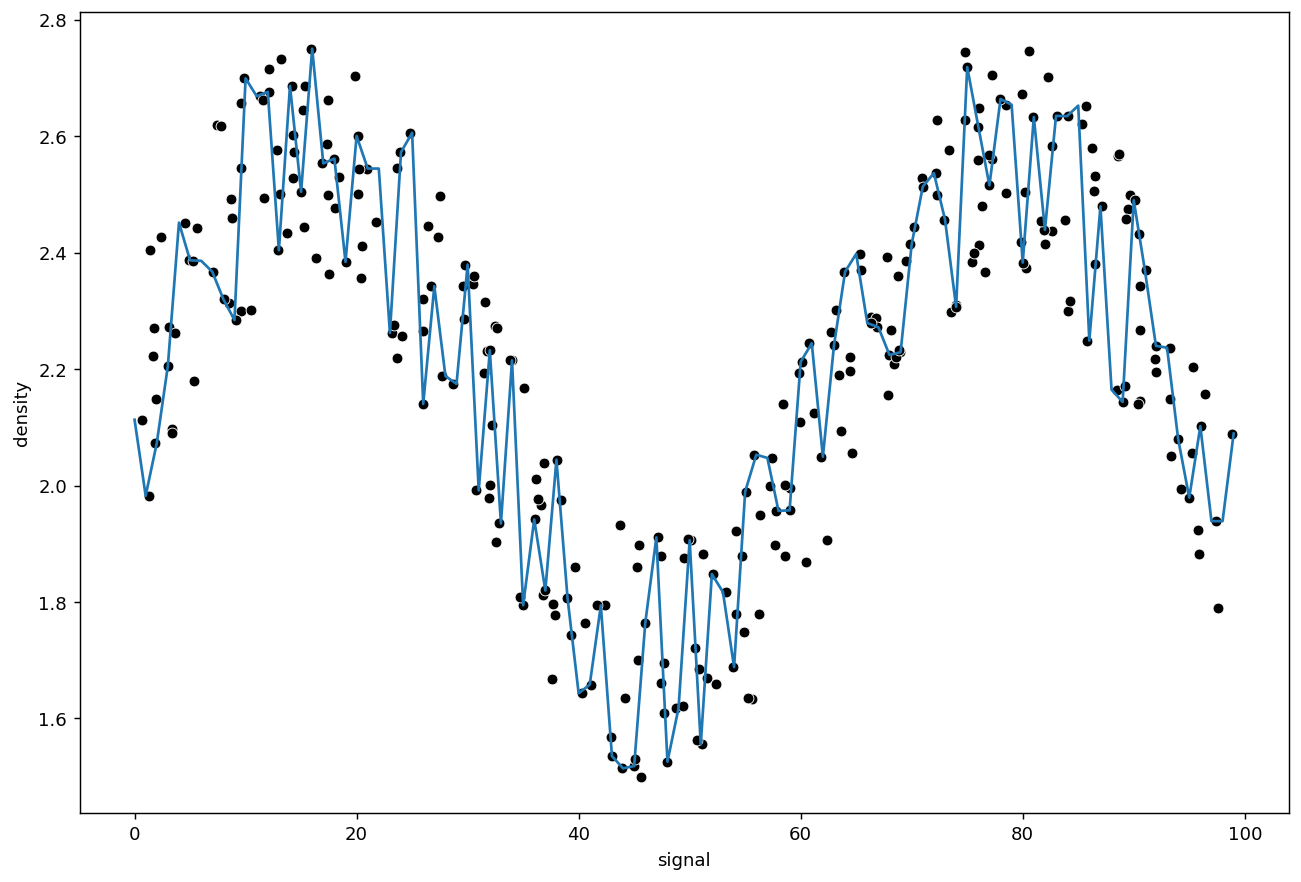

In [161]:
model = DecisionTreeRegressor()
run_model(model, X_train, y_train, X_test, y_test)

In [163]:
from sklearn.svm import SVR

In [165]:
from sklearn.model_selection import GridSearchCV

In [167]:
svr = SVR()
param_grid = {"C": [0.01, 0.1, 1, 5, 10, 100, 1000], "gamma": ["sqrt", "scale"]}
grid = GridSearchCV(svr, param_grid)

C:\Users\honer\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
35 fits failed out of a total of 70.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\honer\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\honer\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\honer\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\honer\anaconda3\Lib\site-packages\

RMSE: 0.12646999302046696
MAE: 0.10854210121348368


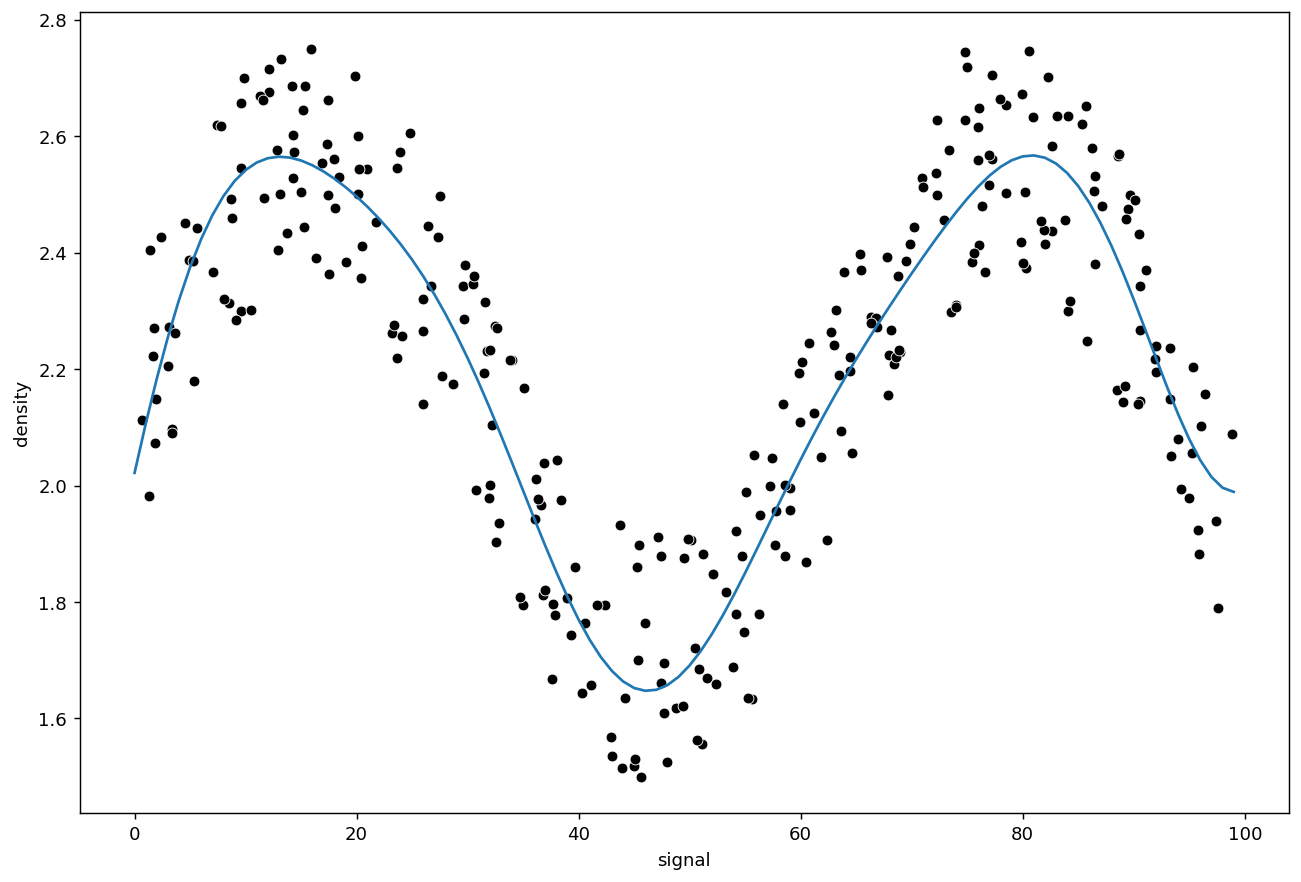

In [169]:
run_model(grid, X_train, y_train, X_test, y_test)

In [171]:
from sklearn.ensemble import RandomForestRegressor

In [173]:
rfr = RandomForestRegressor(n_estimators=10)

RMSE: 0.13901144187159512
MAE: 0.11446478306456379


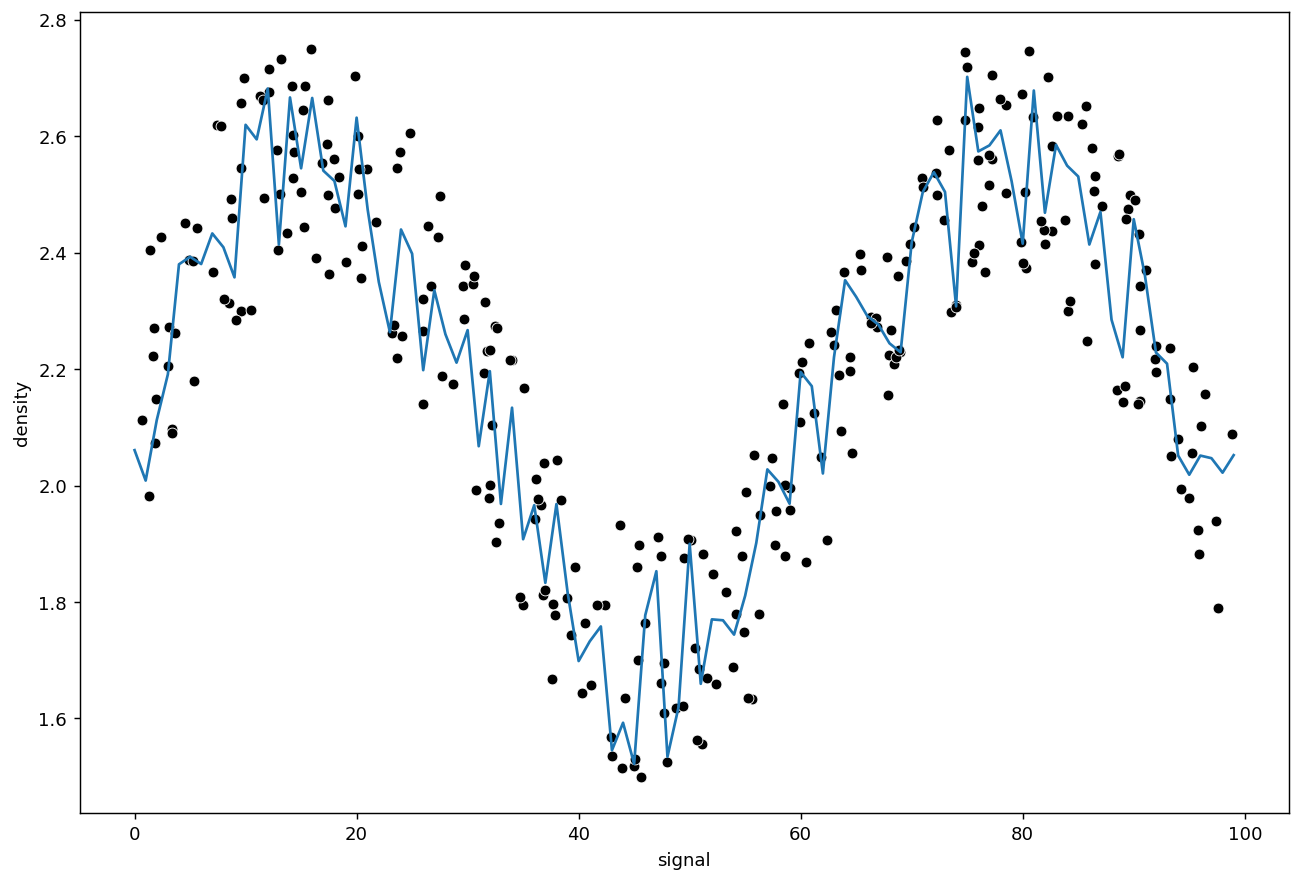

In [177]:
run_model(rfr, X_train, y_train, X_test, y_test)